Sentiment Analysis and Distribution

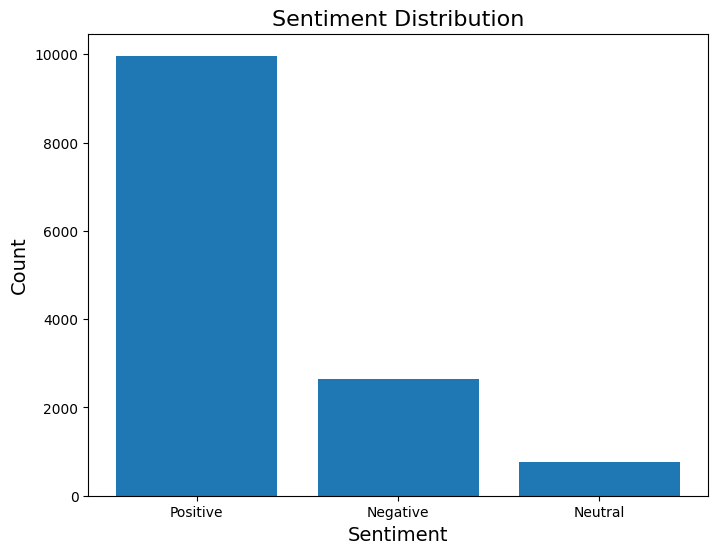

In [6]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
file_path = 'cleaned_merged_comments.csv'
data = pd.read_csv(file_path)

# Step 1: Sentiment Analysis
# Function to calculate sentiment polarity
def get_sentiment(comment):
    return TextBlob(comment).sentiment.polarity

# Apply sentiment analysis to the 'comment' column
data['sentiment'] = data['comment'].apply(get_sentiment)

# Classify sentiment as Positive, Negative, or Neutral
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

data['sentiment_label'] = data['sentiment'].apply(classify_sentiment)

# Step 2: Sentiment Distribution
sentiment_counts = data['sentiment_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Relationship between Sentiment and Upvote Polarity

C:\Users\Pradnya\AppData\Local\Temp\ipykernel_24952\443609333.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('sentiment_bin')['upvote_ratio'].mean().reset_index()


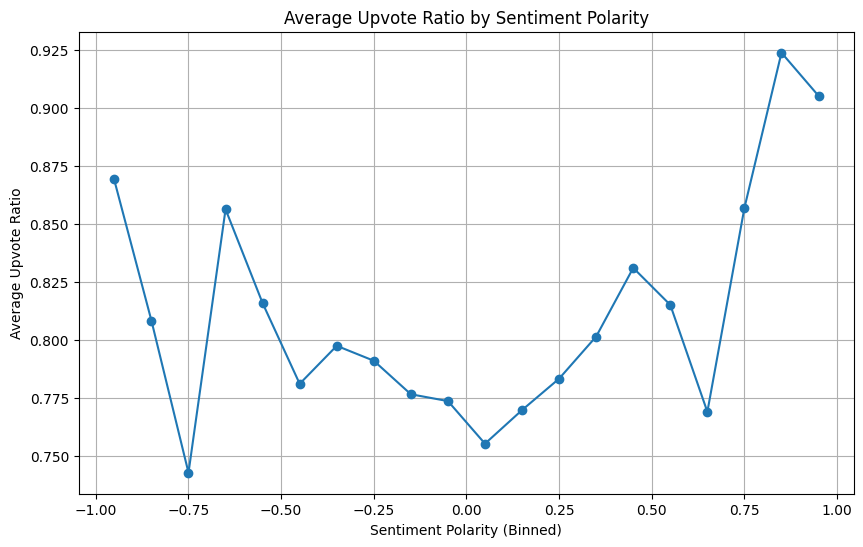

In [ ]:
# Load the data
file_path = 'cleaned_merged_comments.csv'
data = pd.read_csv(file_path)

# Ensure the dataset has 'comment' and 'upvote_ratio' columns
if 'comment' not in data.columns or 'upvote_ratio' not in data.columns:
    raise ValueError("The dataset must contain 'comment' and 'upvote_ratio' columns.")

# Function to calculate sentiment polarity
def get_sentiment(comment):
    if pd.isnull(comment):  # Handle NaN values in comments
        return None
    return TextBlob(comment).sentiment.polarity

# Calculate sentiment for each comment
data['sentiment'] = data['comment'].apply(get_sentiment)

# Drop rows where sentiment or upvote ratio is NaN
data = data.dropna(subset=['sentiment', 'upvote_ratio'])

# Create bins for sentiment polarity
num_bins = 20  # Number of bins for the sentiment polarity
data['sentiment_bin'] = pd.cut(data['sentiment'], bins=num_bins)

# Calculate average upvote ratio for each sentiment bin
binned_data = data.groupby('sentiment_bin')['upvote_ratio'].mean().reset_index()

# Get the center of each bin for plotting
binned_data['bin_center'] = binned_data['sentiment_bin'].apply(lambda x: x.mid)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(binned_data['bin_center'], binned_data['upvote_ratio'], marker='o', linestyle='-')
plt.title('Average Upvote Ratio by Sentiment Polarity')
plt.xlabel('Sentiment Polarity (Binned)')
plt.ylabel('Average Upvote Ratio')
plt.grid(True)
plt.show()


Word Cloud

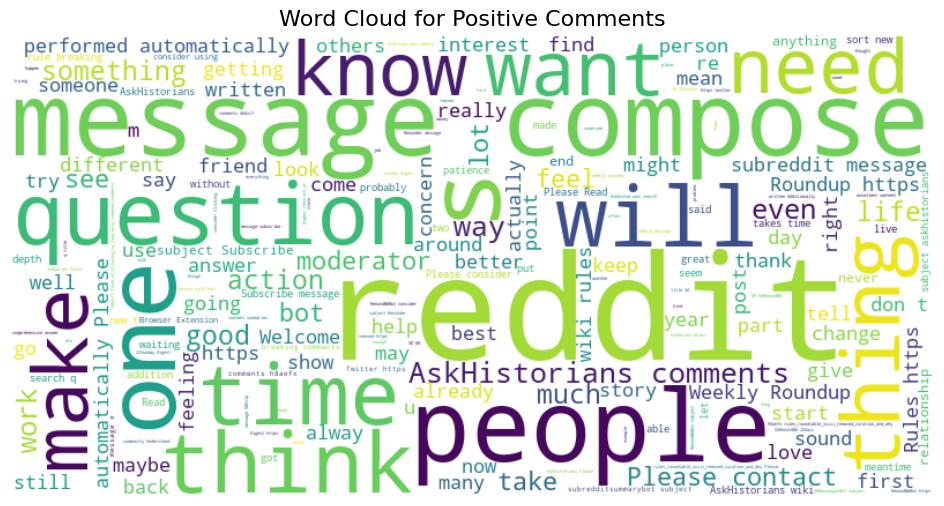

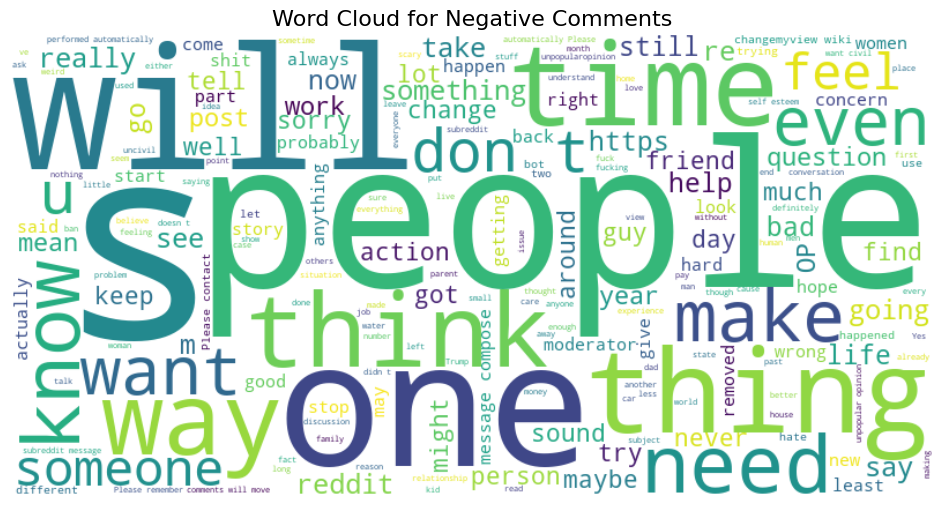

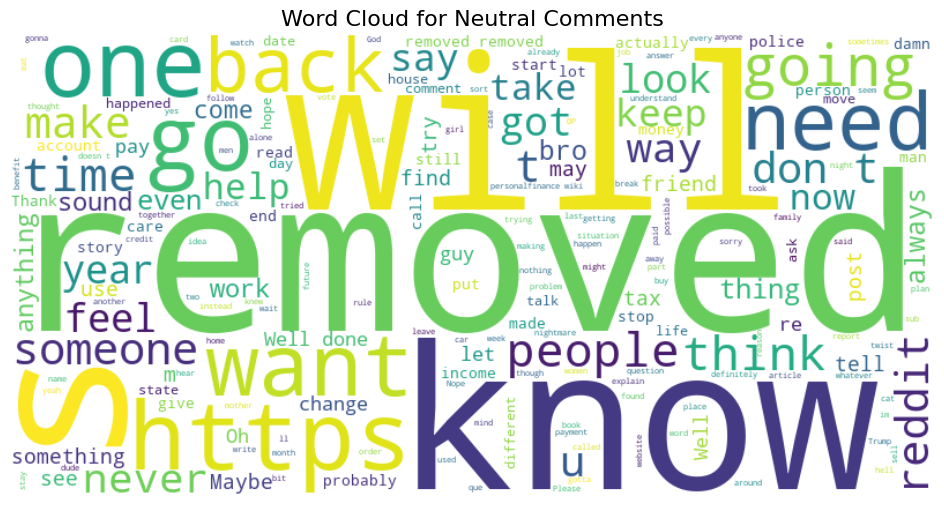

In [4]:
# Step 4: Word Clouds for Sentiments
def generate_wordcloud(sentiment, data, column='comment'):
    comments = " ".join(data[data['sentiment_label'] == sentiment][column].dropna())
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        colormap='viridis', 
        max_words=200
    ).generate(comments)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment} Comments", fontsize=16)
    plt.axis("off")
    plt.show()

for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_wordcloud(sentiment, data)